In [2]:
# 导入必要的头文件
from keras.datasets import reuters
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# 下载数据
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 10000)
category = len(set(y_train))
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(category)
# 建立单词映射表
word2index = reuters.get_word_index()
word2index["UNK"] = 0
index2word = {value : key for key, value in word2index.items()}

(8982,) (8982,)
(2246,) (2246,)
46


In [4]:
# 一条数据的最大长度
max_length = float("-inf")

for item in x_train:
    if len(item) > max_length:
        max_length = len(item)
for item in x_test:
    if len(item) > max_length:
        max_length = len(item)
        
print(max_length)

2376


In [7]:
# 将数据，标签进行二值化

def vectorize_sequencs(item, dimension = 10000):
    results = np.zeros((len(item), dimension))
    for i, sequence in enumerate(item):
        results[i, sequence] = 1 
    return results
x_train = vectorize_sequencs(x_train)
x_test = vectorize_sequencs(x_test)
y_train = to_categorical(y_train, num_classes = category)
y_test = to_categorical(y_test, num_classes = category)

In [10]:
# 搭建模型
model = Sequential()
model.add(Dense(units = 64, input_shape = (10000,), activation = "tanh", name = "dense_1"))
model.add(Dense(units = 64, activation = "tanh", name = "dense_2"))
model.add(Dense(units = category, activation = "softmax", name = "dense_output"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_output (Dense)         (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 编译模型
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

# 运行模型
early_stopping = EarlyStopping(monitor = "val_acc", patience = 5)
history = model.fit(x_train, y_train, batch_size = 32, epochs = 20, verbose = 1, validation_split = 0.2)

# 测试模型
score = model.evaluate(x_test, y_test, verbose = 1)
print("test score:", score[0], "test accuracy:", score[1])

Instructions for updating:
Use tf.cast instead.
Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 5s 708us/step - loss: 1.3438 - acc: 0.7037 - val_loss: 0.9560 - val_acc: 0.7947
Epoch 2/20
7185/7185 [==============================] - 2s 271us/step - loss: 0.6486 - acc: 0.8650 - val_loss: 0.8303 - val_acc: 0.8180
Epoch 3/20
7185/7185 [==============================] - 2s 275us/step - loss: 0.4091 - acc: 0.9184 - val_loss: 0.8150 - val_acc: 0.8125
Epoch 4/20
7185/7185 [==============================] - 2s 269us/step - loss: 0.2838 - acc: 0.9408 - val_loss: 0.8223 - val_acc: 0.8136
Epoch 5/20
7185/7185 [==============================] - 2s 265us/step - loss: 0.2205 - acc: 0.9532 - val_loss: 0.8746 - val_acc: 0.8075
Epoch 6/20
7185/7185 [==============================] - 2s 268us/step - loss: 0.1801 - acc: 0.9566 - val_loss: 0.9193 - val_acc: 0.8102
Epoch 7/20
7185/7185 [==============================] - 2s 271us/step - loss: 0.1553 - a

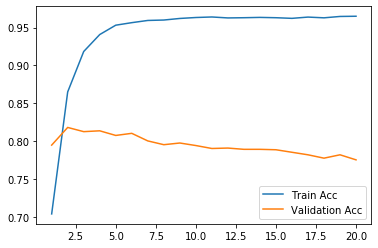

In [12]:
# 绘制结果
plt.figure()
times = [i for i in range(1, 21)]
plt.plot(times, history.history["acc"], label = "Train Acc")
plt.plot(times, history.history["val_acc"], label = "Validation Acc")
plt.legend()
plt.show()